<a href="https://colab.research.google.com/github/camilorey/material_clases/blob/main/visualizadorPruebasSaber11_2019_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as Pandas
import matplotlib.pyplot as PyPlot
%matplotlib inline

Vamos a agregar el archivo de las pruebas Saber 11 2019-2 desde el API de SODA (Socrates) usado por el portal de Datos Abiertos y almacenarlo en un DataFrame

In [ ]:
#read data from Datos Abiertos
documentAddress = 'https://www.datos.gov.co/resource/tkn6-e4ic.json'
saber11DataFrame = Pandas.read_json(documentAddress)
saber11DataFrame.head()

HTTPError: ignored

In [ ]:
Vamos a dividir las variables en varios tipos. Dependiendo si son variables binarias o personales ordinales (para efectos de una clasificación en árbol más adelantes)

In [ ]:
#variables en archivo
variablesPersonalesBinarias = ['estu_genero','estu_tieneetnia','fami_tieneinternet', 'fami_tieneserviciotv',\
                     'fami_tienecomputador','fami_tienelavadora', 'fami_tienehornomicroogas',\
                     'fami_tieneautomovil','fami_tienemotocicleta', 'fami_tieneconsolavideojuegos','estu_privado_libertad']

variablesPersonalesOrdinales = ['fami_estratovivienda','fami_personashogar','fami_cuartoshogar', \
                      'fami_educacionpadre', 'fami_educacionmadre','fami_trabajolaborpadre',\
                      'fami_trabajolabormadre','fami_numlibros', 'fami_comelechederivados',\
                      'fami_comecarnepescadohuevo', 'fami_comecerealfrutoslegumbre',\
                      'fami_situacioneconomica', 'estu_dedicacionlecturadiaria',\
                      'estu_dedicacioninternet', 'estu_horassemanatrabaja','estu_tiporemuneracion',\
                      'estu_nse_individual']

#variables del examen
variablesExamen = ['percentil_lectura_critica', 'desemp_lectura_critica',\
                   'percentil_matematicas', 'desemp_matematicas',\
                   'percentil_c_naturales', 'desemp_c_naturales',\
                   'percentil_sociales_ciudadanas',\
                   'desemp_sociales_ciudadanas',  'percentil_ingles',\
                   'percentil_global','estu_inse_individual']
#variables de puntajes
puntajesExamen = ['punt_matematicas','punt_c_naturales','punt_sociales_ciudadanas','punt_ingles','punt_lectura_critica']

#variables del colegio
variablesColegio = ['cole_naturaleza','cole_bilingue','cole_caracter','cole_genero','cole_calendario','cole_jornada']
#variables objetivo aqui
variableObjetivo = ['desemp_ingles','punt_global']


Vamos a hacer una función para extraer las categorías de una variable no numérica (binaria u ordinal) que nos servirá después para ver cómo subcategorizar diferentes puntajes

In [ ]:
def categoriasDeVariable(nomVariable):
    varInfo = saber11DataFrame[nomVariable].value_counts()
    categorias = []
    for pareja in varInfo.iteritems():
        categorias.append(pareja[0])
    return categorias

Vamos a probar este método visualizando las diferencias que hay entre hombres y mujeres en materia de puntajes obtenidos

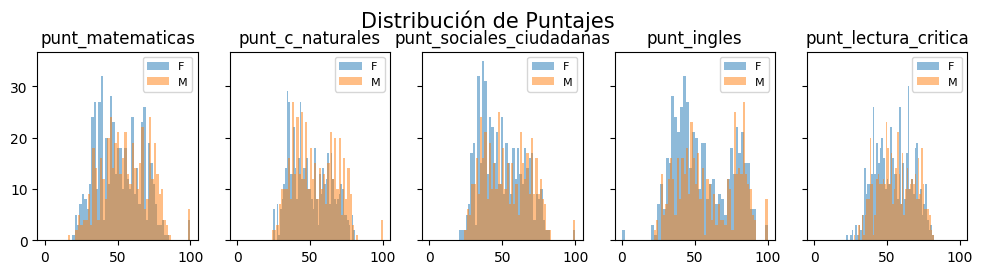

In [ ]:
#figuras para ver distribución de puntajes entre hombres y mujeres
Figure, axes = PyPlot.subplots(1,len(puntajesExamen),figsize=(12,2.5),dpi=100,sharex=True,sharey=True)
generos = categoriasDeVariable('estu_genero')
for i, (var,ax) in enumerate(zip(puntajesExamen,axes.flatten())):
    for genero in generos:
      infoGenero = saber11DataFrame[var].loc[saber11DataFrame['estu_genero'] == genero]
      ax.hist(infoGenero,bins=50,label=genero,alpha=0.5)
      ax.set_title(var)
      ax.legend(prop={'size':8})

PyPlot.suptitle('Distribución de Puntajes',fontsize=15,y=1.05)
PyPlot.show()

Ahora queremos ver cómo la variable de puntaje de ingles se distribuye con respecto a las variables socio-demográficas antes definidas

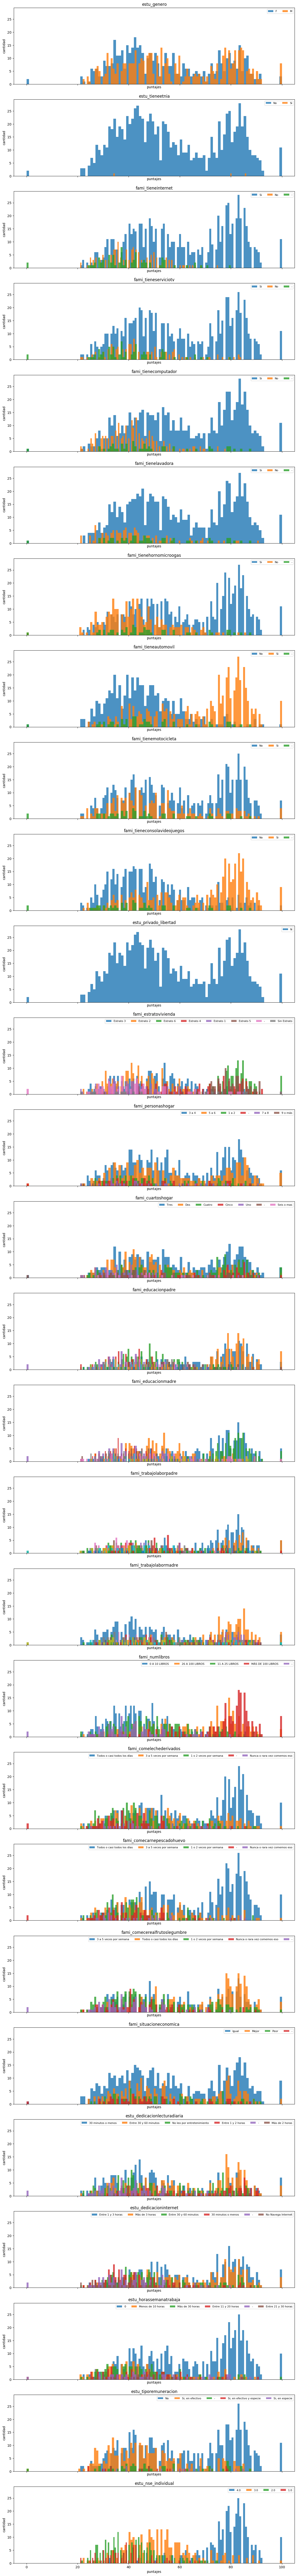

In [ ]:
variableDeInteres = 'punt_ingles'
variablesSocioDemograficas = variablesPersonalesBinarias+variablesPersonalesOrdinales
numVariables = len(variablesSocioDemograficas)
Figure, axes = PyPlot.subplots(numVariables,1,figsize=(15,5*numVariables),dpi=100,sharex=True,sharey=True)
index = 0
for var in variablesSocioDemograficas:
  categorias = categoriasDeVariable(var)
  for cat in categorias:
    data = saber11DataFrame[variableDeInteres].loc[saber11DataFrame[var] == cat]
    axes[index].hist(data,bins=100,label=cat,alpha=0.8)
  axes[index].set_xlabel('puntajes')
  axes[index].set_ylabel('cantidad')
  if len(categorias) <12:
    axes[index].legend(loc='best',ncol=10,fontsize=8)
  axes[index].set_title(var)
  index +=1
PyPlot.show()